Pontificia Universidad Católica de Chile <br>
Departamento de Ciencia de la Computación <br>
IIC2613 - Inteligencia Artificial <br>
Colab por Kaina Galdamez e Ignacio Villanueva (2024-1)<br>

---
<center>
    <h1> Ayudantía 9: Trabajando con KNN y Árboles </h1>
    <h3>
        Ayudantes: Bernardita Alliende y Carlos Stappung<br>
        Segundo Semestre 2024<br>    
        18 de Octubre de 2024
    </h3>
    <img src="https://www.researchgate.net/profile/Laura-Tomppo/publication/339324757/figure/fig1/AS:859809322651649@1582005925753/Principles-of-the-machine-learning-methods-a-decision-tree-b-KNN-classifier-and-c.png" scale=0.5>
    <br>
</center>

<br>

---


### En este notebook encuentras los modelos KNN, DecisionTreeClassifier, RandomForestClassifier y XGBClassifier para el dataset Titanic

### 1 Importar las librerías necesarias

In [ ]:
# Liberías para manejar los datos
import pandas as pd
import seaborn as sns # librería para obtener el conjunto de datos que usaremos
from sklearn.model_selection import train_test_split

# Libería para graficar
import matplotlib.pyplot as plt

# Libería para calcular las métricas de los modelos
from sklearn.metrics import classification_report, accuracy_score

# Libería para obtener la matriz de confusión
from sklearn.metrics import confusion_matrix

# Librería para usar KNN
from sklearn.neighbors import KNeighborsClassifier

# Liberías para el árbol de desición y random forest
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree

# Libería para XGBoost
from xgboost import XGBClassifier

### 2 Cargar el conjunto de datos

Vamos a usar un dataset que viene precargado en la librería sns. Este es un buen conjunto de datos para hacer pruebas rápidas.

In [ ]:
titanic = sns.load_dataset('titanic') # la función load_dataset viene en la librería sns
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### 3 Preprocesamiento de los datos

In [ ]:
# Imputar valores faltantes
titanic['age'].fillna(titanic['age'].median(), inplace=True) # .fillna es una función de pandas
titanic['embarked'].fillna(titanic['embarked'].mode()[0], inplace=True)

# Codificar variables categóricas
titanic['sex'] = titanic['sex'].map({'male': 0, 'female': 1}) # re escribimos la columna sex
titanic['embarked'] = titanic['embarked'].map({'C': 0, 'Q': 1, 'S': 2}) # las letras son la inicial de la ciudad de embarque

# Seleccionar características y la variable objetivo
features = ['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']
target = 'survived' # queremos predecir si sobrevivirán

X = titanic[features] # Atributos/Características
y = titanic[target] # Labels o Etiquetas


<ipython-input-3-d78a83eff5ad>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['age'].fillna(titanic['age'].median(), inplace=True) # .fillna es una función de pandas
<ipython-input-3-d78a83eff5ad>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'd

Por último, dividimos los datos en los sets de Train y Tets. En este ejemplo no usaremos el set de validación.

In [ ]:
# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # train_test_split es una función de sklearn para dividir el set de datos en el conjunto de entranamiento y el conjunto de prueba


### 4 Clasificación con KNN

Accuracy: 0.6983240223463687
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.78      0.75       105
           1       0.65      0.58      0.61        74

    accuracy                           0.70       179
   macro avg       0.69      0.68      0.68       179
weighted avg       0.70      0.70      0.70       179



<Axes: >

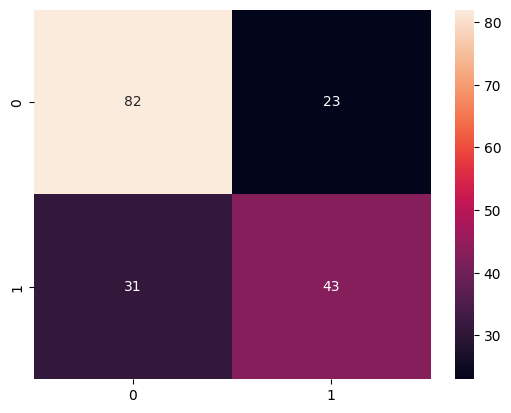

In [ ]:
# Primero instanciamos al clasificador
KNN_classifier = KNeighborsClassifier(n_neighbors=1)

# "Entrenamos" al clasificador
KNN_classifier.fit(X_train, y_train)

# Obtenemos las predicciones
y_pred = KNN_classifier.predict(X_test)


# Evaluación, las funciones accuracy_score y classification_report son parte de sklearn
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Mostramos la matriz de confusión
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot=True)
# recordando que la variable a predecir es sobrevive o no y toma los valores 1 ó 0 respectivamente.

Las filas corresponden a las clases reales, y las columnas corresponden a las clases predichas. ¿Qué representaría el cuadrante (0,1)? ¿Y el (0,0)?

|                        | **Predicción: No Sobrevive (0)** | **Predicción: Sobrevive (1)** |
|------------------------|----------------------------------|-------------------------------|
| **Real: No Sobrevive (0)** | TN (True Negative)            | FP (False Positive)           |
| **Real: Sobrevive (1)**    | FN (False Negative)           | TP (True Positive)            |


Probemos con otros número de vecinos

In [ ]:
number_of_n_neighbors = [1, 3, 4, 5, 7, 9, 11]

for n_neighbors in number_of_n_neighbors:
  # Primero instanciamos al clasificador
  KNN_classifier = KNeighborsClassifier(n_neighbors=n_neighbors)

  # "Entrenamos" al clasificador
  KNN_classifier.fit(X_train, y_train)

  # Obtenemos las predicciones
  y_pred = KNN_classifier.predict(X_test)

  # Evaluación, las funciones accuracy_score y classification_report son parte de sklearn
  print(f"Accuracy usando {n_neighbors} vecinos:", accuracy_score(y_test, y_pred))
  # recordando que la variable a predecir es sobrevive o no y toma los valores 1 ó 0 respectivamente.

Accuracy usando 1 vecinos: 0.6983240223463687
Accuracy usando 3 vecinos: 0.7150837988826816
Accuracy usando 4 vecinos: 0.7262569832402235
Accuracy usando 5 vecinos: 0.7039106145251397
Accuracy usando 7 vecinos: 0.7262569832402235
Accuracy usando 9 vecinos: 0.7206703910614525
Accuracy usando 11 vecinos: 0.7374301675977654


### 5 Entrenamiento del modelo: Árbol de decisión

In [ ]:
# Crear y entrenar el árbol de decisión
arbol = DecisionTreeClassifier(max_depth=3, random_state=42) # DecisionTreeClassifier es la función de sklearn que crea un árbol de desición
# por defecto, los árboles usan criterion gini
arbol.fit(X_train, y_train) # .fit es la función de sklearn para entrenar los modelos

DecisionTreeClassifier(max_depth=3, random_state=42)

### 6 Podemos ver el árbol de decisión creado

[0 1]


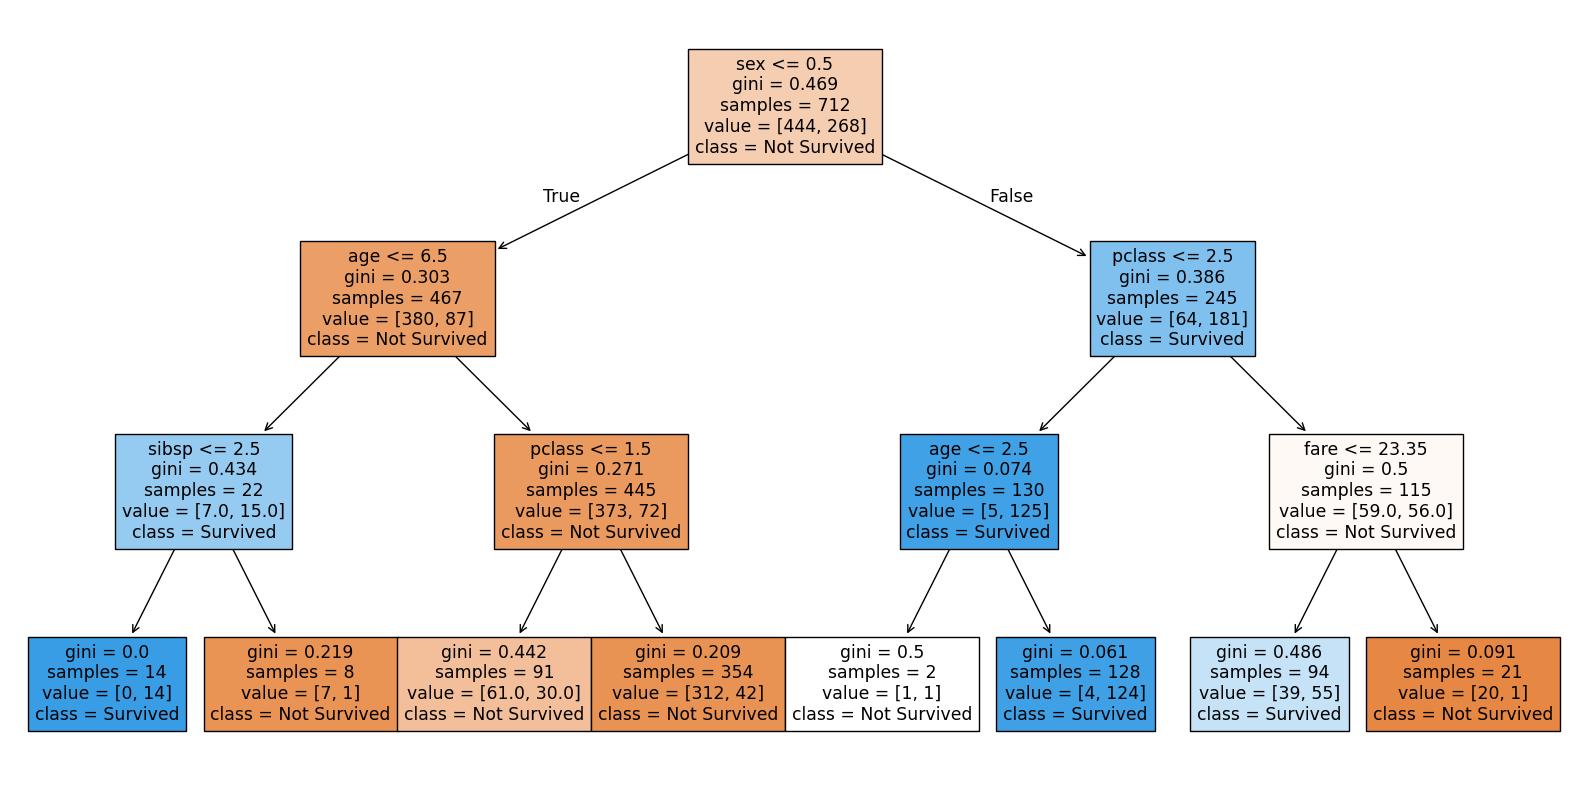

In [ ]:
# Visualizar el árbol de decisión
plt.figure(figsize=(20,10)) # ajusta el tamaño de lo que será graficado
print(arbol.classes_)
tree.plot_tree(arbol, feature_names=features, class_names=['Not Survived', 'Survived'], filled=True) # tree.plot_tree es una función de sklearn para graficar los árboles
plt.show()

### 7 Evaluación del modelo

In [ ]:
# Predicciones
y_pred = arbol.predict(X_test) # .predict es una función de sklearn para predecir sobre algún conjunto de datos
                               # Acá predecimos sobre el conjunto de prueba

# Evaluación, las funciones accuracy_score y classification_report son parte de sklearn
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
# recordando que la variable a predecir es sobrevive o no y toma los valores 1 ó 0 respectivamente.

Accuracy: 0.7988826815642458
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.88      0.84       105
           1       0.80      0.69      0.74        74

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179



### 8 Visualización de resultados

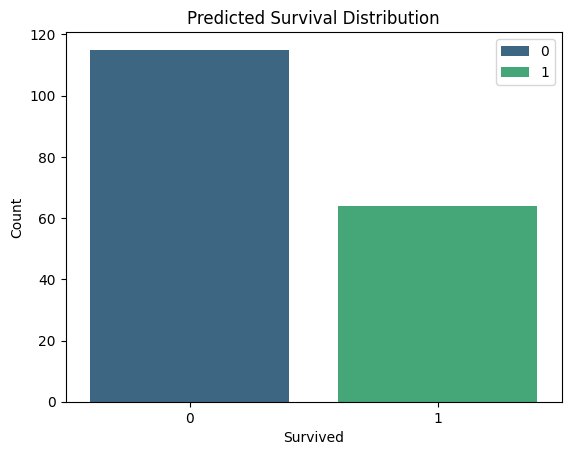

In [ ]:
# Gráfico de barras para mostrar la distribución de las predicciones

sns.countplot(x=y_pred, palette='viridis', hue=y_pred) # palette es la paleta de colores del gráfico
                                                       # hue es para dividir y colorear los datos
plt.title('Predicted Survival Distribution')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

### ¿Qué pasa si no preprocesamos los datos?

In [ ]:
from sklearn.preprocessing import StandardScaler
# Cargar los datos
titanic = sns.load_dataset('titanic')

# Imputar valores faltantes
titanic['age'].fillna(titanic['age'].median(), inplace=True)
titanic['embarked'].fillna(titanic['embarked'].mode()[0], inplace=True)
# Codificar variables categóricas
titanic['sex'] = titanic['sex'].map({'male': 0, 'female': 1})
titanic['embarked'] = titanic['embarked'].map({'C': 0, 'Q': 1, 'S': 2})

# Seleccionar características y la variable objetivo
features = ['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']
target = 'survived'
X = titanic[features]
y = titanic[target]
# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Crear y entrenar el árbol de decisión
arbol = DecisionTreeClassifier(max_depth=3, random_state=42)
arbol.fit(X_train, y_train)

<ipython-input-13-41a12021d7d7>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['age'].fillna(titanic['age'].median(), inplace=True)
<ipython-input-13-41a12021d7d7>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True

DecisionTreeClassifier(max_depth=3, random_state=42)

## Ahora probemos con Random Forest

### Entrenamiento del modelo: Random Forest

In [ ]:
# Crear y entrenar el Random Forest
random_forest = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=42)
random_forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, random_state=42)

### 6 Evaluación del modelo

In [ ]:
# Predicciones
y_pred = random_forest.predict(X_test)
# Evaluación
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8100558659217877
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.90      0.85       105
           1       0.82      0.69      0.75        74

    accuracy                           0.81       179
   macro avg       0.81      0.79      0.80       179
weighted avg       0.81      0.81      0.81       179



## Ahora probemos con XGBoosting

### 4 Entrenamiento del modelo: XGBoosting

In [ ]:
from xgboost import XGBClassifier
# Crear el modelo XGBoost
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
# Entrenar el modelo
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [15:52:55] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

### 6 Evaluación del modelo

In [ ]:
# Predicciones
y_pred = model.predict(X_test)
# Evaluación
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7877094972067039
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.81      0.82       105
           1       0.74      0.76      0.75        74

    accuracy                           0.79       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179

